In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nba = pd.read_csv("/content/drive/MyDrive/Projects/shot_logs.csv")
df = nba.copy()
df.head()


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [ ]:
df.shape


(128069, 21)

In [ ]:
df.isnull().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

In [ ]:
df[df.SHOT_CLOCK.isnull()==True].head()


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
24,21400845,"FEB 25, 2015 - CHA @ CHI",A,W,12,6,2,0:04,NaN,0,...,25.2,3,missed,"Butler, Jimmy",202710,3.6,0,0,brian roberts,203148
54,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,14,4,0:01,NaN,5,...,34.4,3,missed,"Hill, George",201588,3.6,0,0,brian roberts,203148
76,21400742,"FEB 05, 2015 - CHA vs. WAS",H,W,7,10,3,0:01,NaN,2,...,13.1,2,made,"Butler, Rasual",2446,2.5,1,2,brian roberts,203148
129,21400611,"JAN 19, 2015 - CHA vs. MIN",H,W,25,7,2,0:02,NaN,5,...,12.0,2,missed,"Williams, Mo",2590,4.0,0,0,brian roberts,203148


In [ ]:
df.SHOT_CLOCK = df.SHOT_CLOCK.fillna(df.SHOT_CLOCK.mean())

In [ ]:
df.isnull().sum()

GAME_ID                       0
MATCHUP                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
dtype: int64

In [ ]:
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.636611,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.400000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.453344,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.400000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [ ]:
len(df.TOUCH_TIME[df.TOUCH_TIME<0])

312

In [ ]:
df.TOUCH_TIME[df.TOUCH_TIME<0] = df.TOUCH_TIME.mean()

<ipython-input-11-c1c1002dfccf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TOUCH_TIME[df.TOUCH_TIME<0] = df.TOUCH_TIME.mean()


In [ ]:
len(df.TOUCH_TIME[df.TOUCH_TIME>24.0])

4

In [ ]:
df.TOUCH_TIME[df.TOUCH_TIME>24.0] = 24

<ipython-input-13-311d7ed9d614>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TOUCH_TIME[df.TOUCH_TIME>24.0] = 24


In [ ]:
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.778681,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.636611,3.477760,2.983448,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.400000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.453344,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.400000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.000000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  128069 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [ ]:
df.LOCATION = df.LOCATION.map({"H":1,"A":0})
df.W = df.W.map({"W":1,"L":0})
df.PTS_TYPE = df.PTS_TYPE.map({2:0,3:1})
df.SHOT_RESULT = df.SHOT_RESULT.map({"made":1,"missed":0})

In [ ]:
df = df.rename(columns={"LOCATION":"HOME_AWAY","PTS_TYPE":"3PTS_SHOT","player_name":"PLAYER_NAME","player_id":"PLAYER_ID"})

In [ ]:
df.nunique()

GAME_ID                        904
MATCHUP                       1808
HOME_AWAY                        2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     242
DRIBBLES                        33
TOUCH_TIME                     238
SHOT_DIST                      448
3PTS_SHOT                        2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
PLAYER_NAME                    281
PLAYER_ID                      281
dtype: int64

In [ ]:
df.head()

,GAME_ID,MATCHUP,HOME_AWAY,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,3PTS_SHOT,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1,1,1:09,10.800000,2,...,7.7,0,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,2,1,0:14,3.400000,0,...,28.2,1,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,3,1,0:00,12.453344,3,...,10.1,0,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,4,2,11:47,10.300000,2,...,17.2,0,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,5,2,10:34,10.900000,2,...,3.7,0,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [ ]:
df.GAME_CLOCK = df.GAME_CLOCK.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

In [ ]:
df.head()

,GAME_ID,MATCHUP,HOME_AWAY,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,3PTS_SHOT,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1,1,69,10.800000,2,...,7.7,0,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,2,1,14,3.400000,0,...,28.2,1,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,3,1,0,12.453344,3,...,10.1,0,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,4,2,707,10.300000,2,...,17.2,0,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,5,2,634,10.900000,2,...,3.7,0,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [ ]:
df = df.drop(columns=["GAME_ID",
                          "MATCHUP",
                          "W",
                          "PLAYER_NAME",
                          "SHOT_NUMBER",
                          "CLOSEST_DEFENDER",
                          "CLOSEST_DEFENDER_PLAYER_ID",
                          "FGM",
                          "PTS",
                          "PLAYER_ID"], axis=1)

In [ ]:
df.head()

,HOME_AWAY,FINAL_MARGIN,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,3PTS_SHOT,SHOT_RESULT,CLOSE_DEF_DIST
0,0,24,1,69,10.800000,2,1.9,7.7,0,1,1.3
1,0,24,1,14,3.400000,0,0.8,28.2,1,0,6.1
2,0,24,1,0,12.453344,3,2.7,10.1,0,0,0.9
3,0,24,2,707,10.300000,2,1.9,17.2,0,0,3.4
4,0,24,2,634,10.900000,2,2.7,3.7,0,0,1.1


In [ ]:
df.describe()

,HOME_AWAY,FINAL_MARGIN,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,3PTS_SHOT,SHOT_RESULT,CLOSE_DEF_DIST
count,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.499215,0.208723,2.469427,351.393811,12.453344,2.023355,2.778681,13.571504,0.264670,0.452139,4.123015
std,0.500001,13.233267,1.139919,207.590603,5.636611,3.477760,2.983448,8.888964,0.441159,0.497706,2.756446
min,0.000000,-53.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.000000,1.000000,172.000000,8.400000,0.000000,0.900000,4.700000,0.000000,0.000000,2.300000
50%,0.000000,1.000000,2.000000,352.000000,12.453344,1.000000,1.600000,13.700000,0.000000,0.000000,3.700000
75%,1.000000,9.000000,3.000000,531.000000,16.400000,2.000000,3.700000,22.500000,1.000000,1.000000,5.300000
max,1.000000,53.000000,7.000000,720.000000,24.000000,32.000000,24.000000,47.200000,1.000000,1.000000,53.200000


In [ ]:
X1 = df[["HOME_AWAY",	"FINAL_MARGIN",	"PERIOD",	"GAME_CLOCK",	"SHOT_CLOCK",	"DRIBBLES",	"TOUCH_TIME",	"SHOT_DIST", "3PTS_SHOT",	"CLOSE_DEF_DIST"]]
Y1 = df['SHOT_RESULT']


In [ ]:
X1_Train, X1_Test, Y1_Train, Y1_Test = train_test_split(X1, Y1, test_size=0.2)

In [ ]:
#XGBoost

In [ ]:
%%time
xgbst1 = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, objective='binary:logistic')

xgbst1.fit(X1_Train, Y1_Train)

Y1_Pred = xgbst1.predict(X1_Test)

CPU times: user 869 ms, sys: 16.8 ms, total: 886 ms
Wall time: 500 ms


In [ ]:
Accuracy = accuracy_score(Y1_Test, Y1_Pred)
Confusion_Matrix = confusion_matrix(Y1_Test, Y1_Pred)
Classification_Report = classification_report(Y1_Test, Y1_Pred)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

Accuracy: 0.6216912625907707
Confusion Matrix:
[[12188  1939]
 [ 7751  3736]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.86      0.72     14127
           1       0.66      0.33      0.44     11487

    accuracy                           0.62     25614
   macro avg       0.63      0.59      0.58     25614
weighted avg       0.63      0.62      0.59     25614



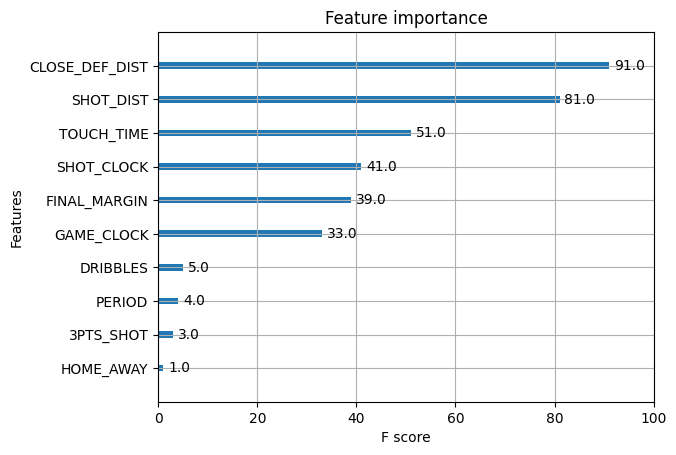

In [ ]:
# plot feature importance
plot_importance(xgbst1)
plt.show()

In [ ]:
X2 = df[["FINAL_MARGIN",	"SHOT_CLOCK",	"TOUCH_TIME",	"SHOT_DIST",	"CLOSE_DEF_DIST"]]
Y2 = df['SHOT_RESULT']

In [ ]:
X2_Train, X2_Test, Y2_Train, Y2_Test = train_test_split(X2, Y2, test_size=0.2)

In [ ]:
%%time
xgbst2 = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, objective='binary:logistic')

xgbst2.fit(X2_Train, Y2_Train)

Y2_Pred = xgbst2.predict(X2_Test)

CPU times: user 711 ms, sys: 17.1 ms, total: 728 ms
Wall time: 420 ms


In [ ]:
Accuracy = accuracy_score(Y2_Test, Y2_Pred)
Confusion_Matrix = confusion_matrix(Y2_Test, Y2_Pred)
Classification_Report = classification_report(Y2_Test, Y2_Pred)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

Accuracy: 0.6230967439681424
Confusion Matrix:
[[12082  1998]
 [ 7656  3878]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.86      0.71     14080
           1       0.66      0.34      0.45     11534

    accuracy                           0.62     25614
   macro avg       0.64      0.60      0.58     25614
weighted avg       0.63      0.62      0.59     25614



In [ ]:
#XGBOOST_HP

In [ ]:
Param_Grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.001],
    'max_depth': [2, 3]
}

Grid_Search = GridSearchCV(estimator=xgbst2, param_grid=Param_Grid, cv=5, scoring='accuracy')

Grid_Search.fit(X2_Train, Y2_Train)

print("Best Hyperparameters:", Grid_Search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
%%time
xgbst_hp = XGBClassifier(n_estimators=150, max_depth=3, learning_rate=0.1, objective='binary:logistic')

xgbst_hp.fit(X2_Train, Y2_Train)

Y_hp_Pred = xgbst_hp.predict(X2_Test)

CPU times: user 1.53 s, sys: 6.99 ms, total: 1.53 s
Wall time: 789 ms


In [ ]:
Accuracy = accuracy_score(Y2_Test, Y_hp_Pred)
Confusion_Matrix = confusion_matrix(Y2_Test, Y_hp_Pred)
Classification_Report = classification_report(Y2_Test, Y_hp_Pred)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

Accuracy: 0.6233700320137425
Confusion Matrix:
[[11933  2147]
 [ 7500  4034]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71     14080
           1       0.65      0.35      0.46     11534

    accuracy                           0.62     25614
   macro avg       0.63      0.60      0.58     25614
weighted avg       0.63      0.62      0.60     25614



In [ ]:
#RandomForest

In [ ]:
%%time
RF_Model1 = RandomForestClassifier(n_estimators=50, max_depth=3)
RF_Model1.fit(X1_Train, Y1_Train)
Y3_Pred = RF_Model1.predict(X1_Test)

CPU times: user 2.29 s, sys: 9.06 ms, total: 2.3 s
Wall time: 2.29 s


In [ ]:
Accuracy = accuracy_score(Y2_Test, Y3_Pred)
Confusion_Matrix = confusion_matrix(Y2_Test, Y3_Pred)
Classification_Report = classification_report(Y2_Test, Y3_Pred)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

Accuracy: 0.5232685250253768
Confusion Matrix:
[[10438  3642]
 [ 8569  2965]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.74      0.63     14080
           1       0.45      0.26      0.33     11534

    accuracy                           0.52     25614
   macro avg       0.50      0.50      0.48     25614
weighted avg       0.50      0.52      0.49     25614



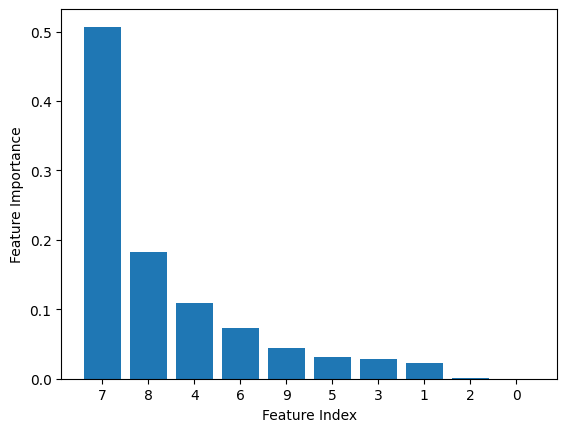

In [ ]:
importances = RF_Model1.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.bar(range(X1_Train.shape[1]), importances[indices])
plt.xticks(range(X1_Train.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.show()

In [ ]:
X3 = df[["3PTS_SHOT",	"SHOT_CLOCK",	"TOUCH_TIME",	"SHOT_DIST",	"CLOSE_DEF_DIST"]]
Y3= df['SHOT_RESULT']

In [ ]:
X3_Train, X3_Test, Y3_Train, Y3_Test = train_test_split(X3, Y3, test_size=0.2)

In [ ]:
%%time
RF_Model2 = RandomForestClassifier(n_estimators=50, max_depth=3)
RF_Model2.fit(X3_Train, Y3_Train)
Y31_Pred = RF_Model2.predict(X3_Test)


CPU times: user 2.68 s, sys: 8.96 ms, total: 2.69 s
Wall time: 2.75 s


In [ ]:
Accuracy = accuracy_score(Y3_Test, Y31_Pred)
Confusion_Matrix = confusion_matrix(Y3_Test, Y31_Pred)
Classification_Report = classification_report(Y3_Test, Y31_Pred)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

Accuracy: 0.6083391895057391
Confusion Matrix:
[[11435  2633]
 [ 7399  4147]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.81      0.70     14068
           1       0.61      0.36      0.45     11546

    accuracy                           0.61     25614
   macro avg       0.61      0.59      0.57     25614
weighted avg       0.61      0.61      0.59     25614

